## 谱聚类

#### 王中琦 1120190892

In [3]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

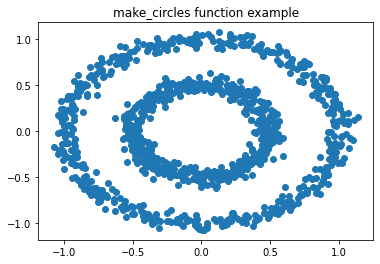

In [6]:
def get_data():
    '''
    获取数据
    '''
    x1,y1=datasets.make_circles(n_samples=1000,factor=0.5,noise=0.05)
    plt.title('make_circles function example')
    plt.scatter(x1[:, 0], x1[:, 1], marker='o')
    plt.show()

    return x1

x1 = get_data()

In [5]:
def euclidDistance(x1, x2, sqrt_flag=False):
    '''
    计算欧氏距离
    '''
    res = np.sum((x1-x2)**2)
    if sqrt_flag:
        res = np.sqrt(res)
    return res

In [8]:
def calEuclidDistanceMatrix(X):
    '''
    初始化邻接矩阵，以距离作为权重
    '''
    X = np.array(X)
    S = np.zeros((len(X), len(X)))
    for i in range(len(X)):
        for j in range(i+1, len(X)):
            S[i][j] = 1.0 * euclidDistance(X[i], X[j])
            S[j][i] = S[i][j] # 对称矩阵
    return S

In [9]:
S = calEuclidDistanceMatrix(x1)
S # 初始化邻接矩阵

array([[0.        , 0.00619098, 0.76923554, ..., 1.05732129, 0.56981869,
        0.77046345],
       [0.00619098, 0.        , 0.74628851, ..., 0.94263722, 0.45723109,
        0.73638845],
       [0.76923554, 0.74628851, 0.        , ..., 0.37000346, 1.0770687 ,
        0.00531221],
       ...,
       [1.05732129, 0.94263722, 0.37000346, ..., 0.        , 0.48158034,
        0.28673631],
       [0.56981869, 0.45723109, 1.0770687 , ..., 0.48158034, 0.        ,
        0.97118621],
       [0.77046345, 0.73638845, 0.00531221, ..., 0.28673631, 0.97118621,
        0.        ]])

In [16]:
def myKNN(S, k, sigma=1.0):
    '''
    K邻近法构建邻接矩阵
    '''
    N = len(S)
    #定义邻接矩阵
    A = np.zeros((N,N))
    for i in range(N):
        #对每个样本进行编号
        dist_with_index = zip(S[i], range(N))
        #对距离进行排序
        dist_with_index = sorted(dist_with_index, key=lambda x:x[0])
        #取得距离该样本前k个最小距离的编号
        neighbours_id = [dist_with_index[m][1] for m in range(k+1)] # xi's k nearest neighbours
        #构建邻接矩阵
        for j in neighbours_id: # 只要单向满足近邻就行
            A[i][j] = np.exp(-S[i][j]/2/sigma/sigma)
            A[j][i] = A[i][j] # mutually

    return A

In [17]:
A = myKNN(S,3)
A

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [14]:
def calLaplacianMatrix(adjacentMatrix):
    '''
    计算拉普拉斯矩阵
    '''
    # 计算矩阵的度 D=sum(A)
    degreeMatrix = np.sum(adjacentMatrix, axis=1)

    # 计算拉普拉斯矩阵: L=D-A
    laplacianMatrix = np.diag(degreeMatrix) - adjacentMatrix

    # 规范化
    # D^(-1/2) L D^(-1/2)
    sqrtDegreeMatrix = np.diag(1.0 / (degreeMatrix ** (0.5)))
    return np.dot(np.dot(sqrtDegreeMatrix, laplacianMatrix), sqrtDegreeMatrix)

In [18]:
L_sys = calLaplacianMatrix(A)
L_sys

array([[0.79989362, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.83324084, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.79988911, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.83324184, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.79995563,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.79994686]])

In [11]:
def normlize(L_sys):
    '''
    特征向量标准化
    '''
    lam, V = np.linalg.eig(L_sys) # H'shape is n*n
    lam = zip(lam, range(len(lam)))
    lam = sorted(lam, key=lambda x:x[0])
    H = np.vstack([V[:,i] for (v, i) in lam[:1000]]).T
    H = np.asarray(H).astype(float)

    return H

In [19]:
H = normlize(L_sys)
H

array([[ 4.51144348e-02, -4.41904043e-03,  2.76207544e-04, ...,
         3.60458445e-16, -6.55135935e-09,  2.48516044e-16],
       [ 4.94198176e-02, -4.84076046e-03,  3.02566717e-04, ...,
        -5.85811360e-16,  1.66551271e-09, -4.21906828e-16],
       [ 4.51139263e-02, -4.41899061e-03,  2.76204430e-04, ...,
         2.71983461e-16, -9.72406374e-16, -1.05844460e-06],
       ...,
       [ 4.94199651e-02, -4.84077491e-03,  3.02567620e-04, ...,
        -2.58152215e-16,  1.12752927e-11, -7.66587678e-03],
       [ 4.51214263e-02, -4.41972526e-03,  2.76250348e-04, ...,
        -4.27990827e-15, -3.15624563e-02,  9.34951038e-11],
       [ 4.51204377e-02, -4.41962842e-03,  2.76244296e-04, ...,
        -5.22184575e-16,  2.09932714e-16, -1.85390536e-07]])

In [10]:
from sklearn.cluster import KMeans
def spKmeans(H):
    sp_kmeans = KMeans(n_clusters=2).fit(H)
    return sp_kmeans.labels_

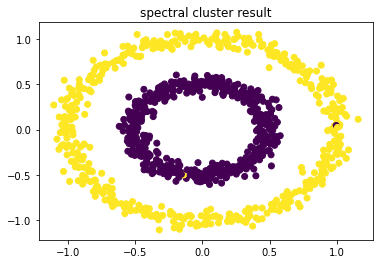

In [11]:
labels = spKmeans(H)
plt.title('spectral cluster result')
plt.scatter(x1[:, 0], x1[:, 1], marker='o',c=labels)
plt.show()